In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#collecting data
data=pd.read_csv(r'c:\Users\acer\Downloads\iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns=["Id","Species"],inplace=True)

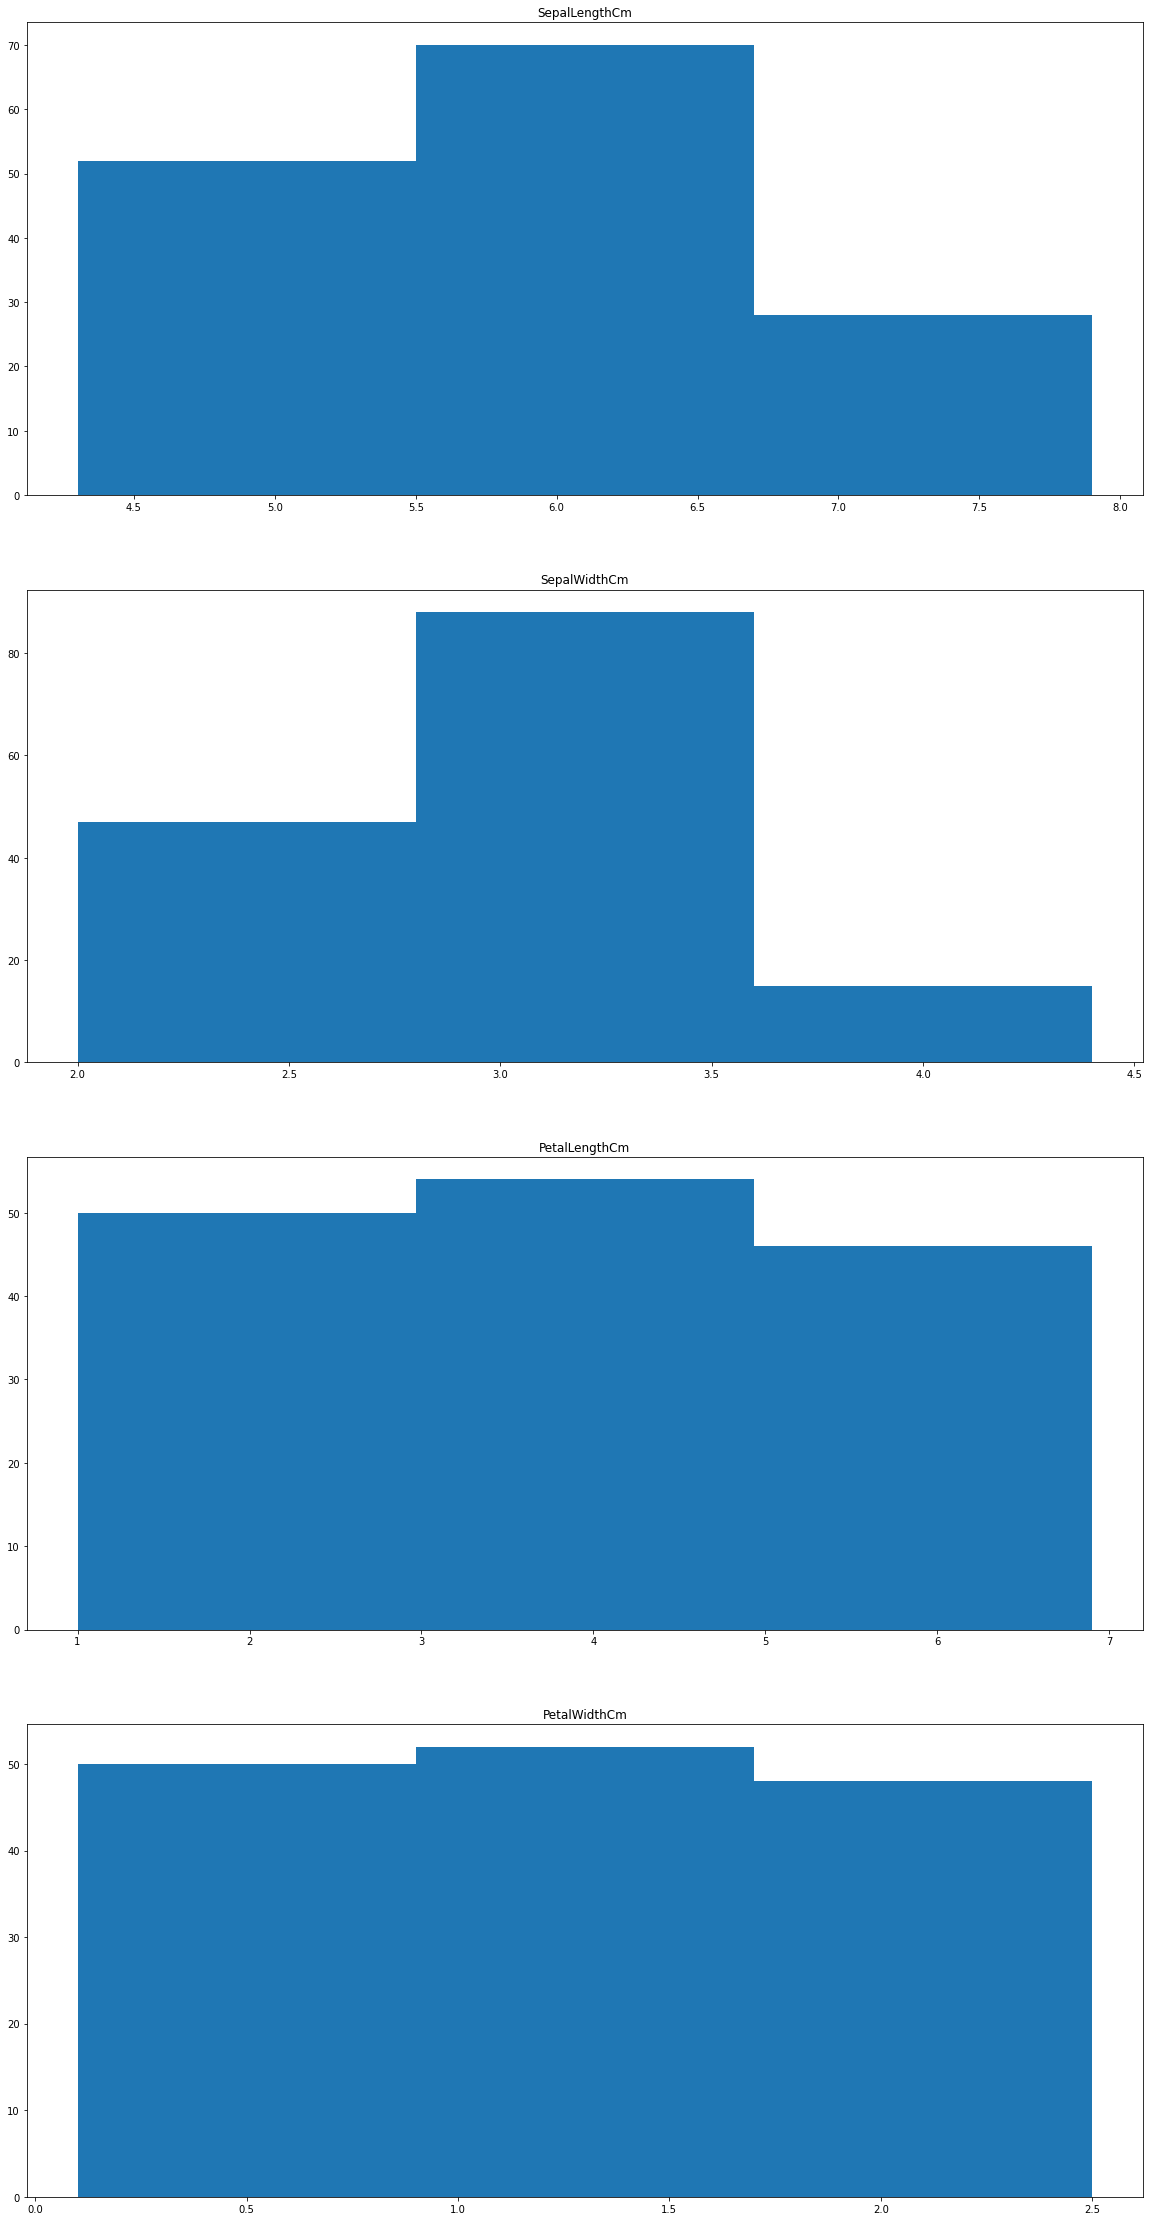

In [5]:
fig,axes=plt.subplots(4,1,figsize=(20,40))

for col,axis in zip(data.columns,axes):
    axis.hist(data[[col]],bins=3)
    axis.set_title(f'{col}')

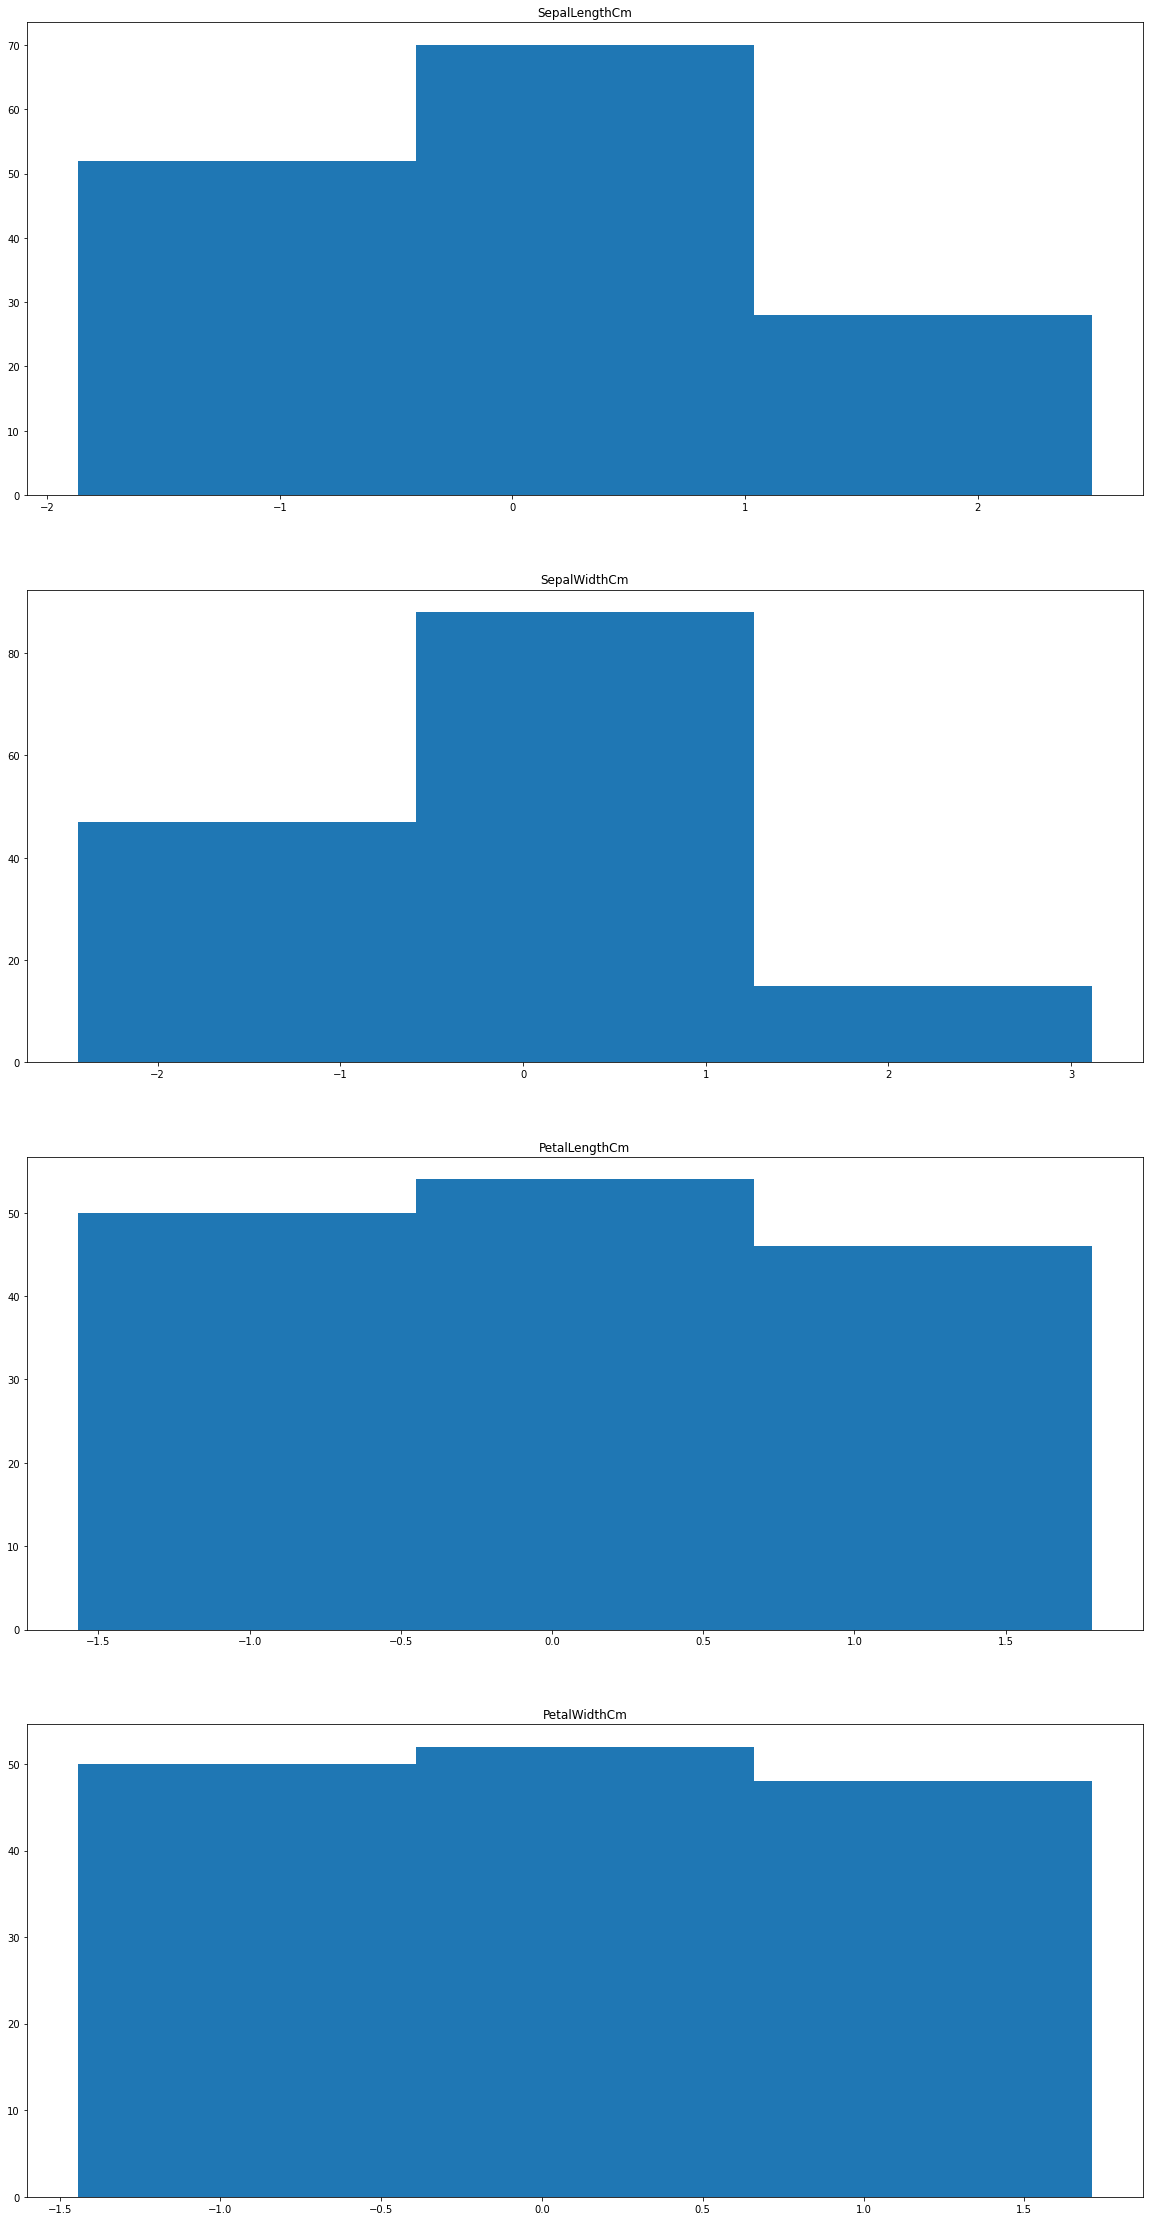

In [6]:
#data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()
scaledx=scaler.fit_transform(data)
scaledx[:,0]

fig1,axes1=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes1):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

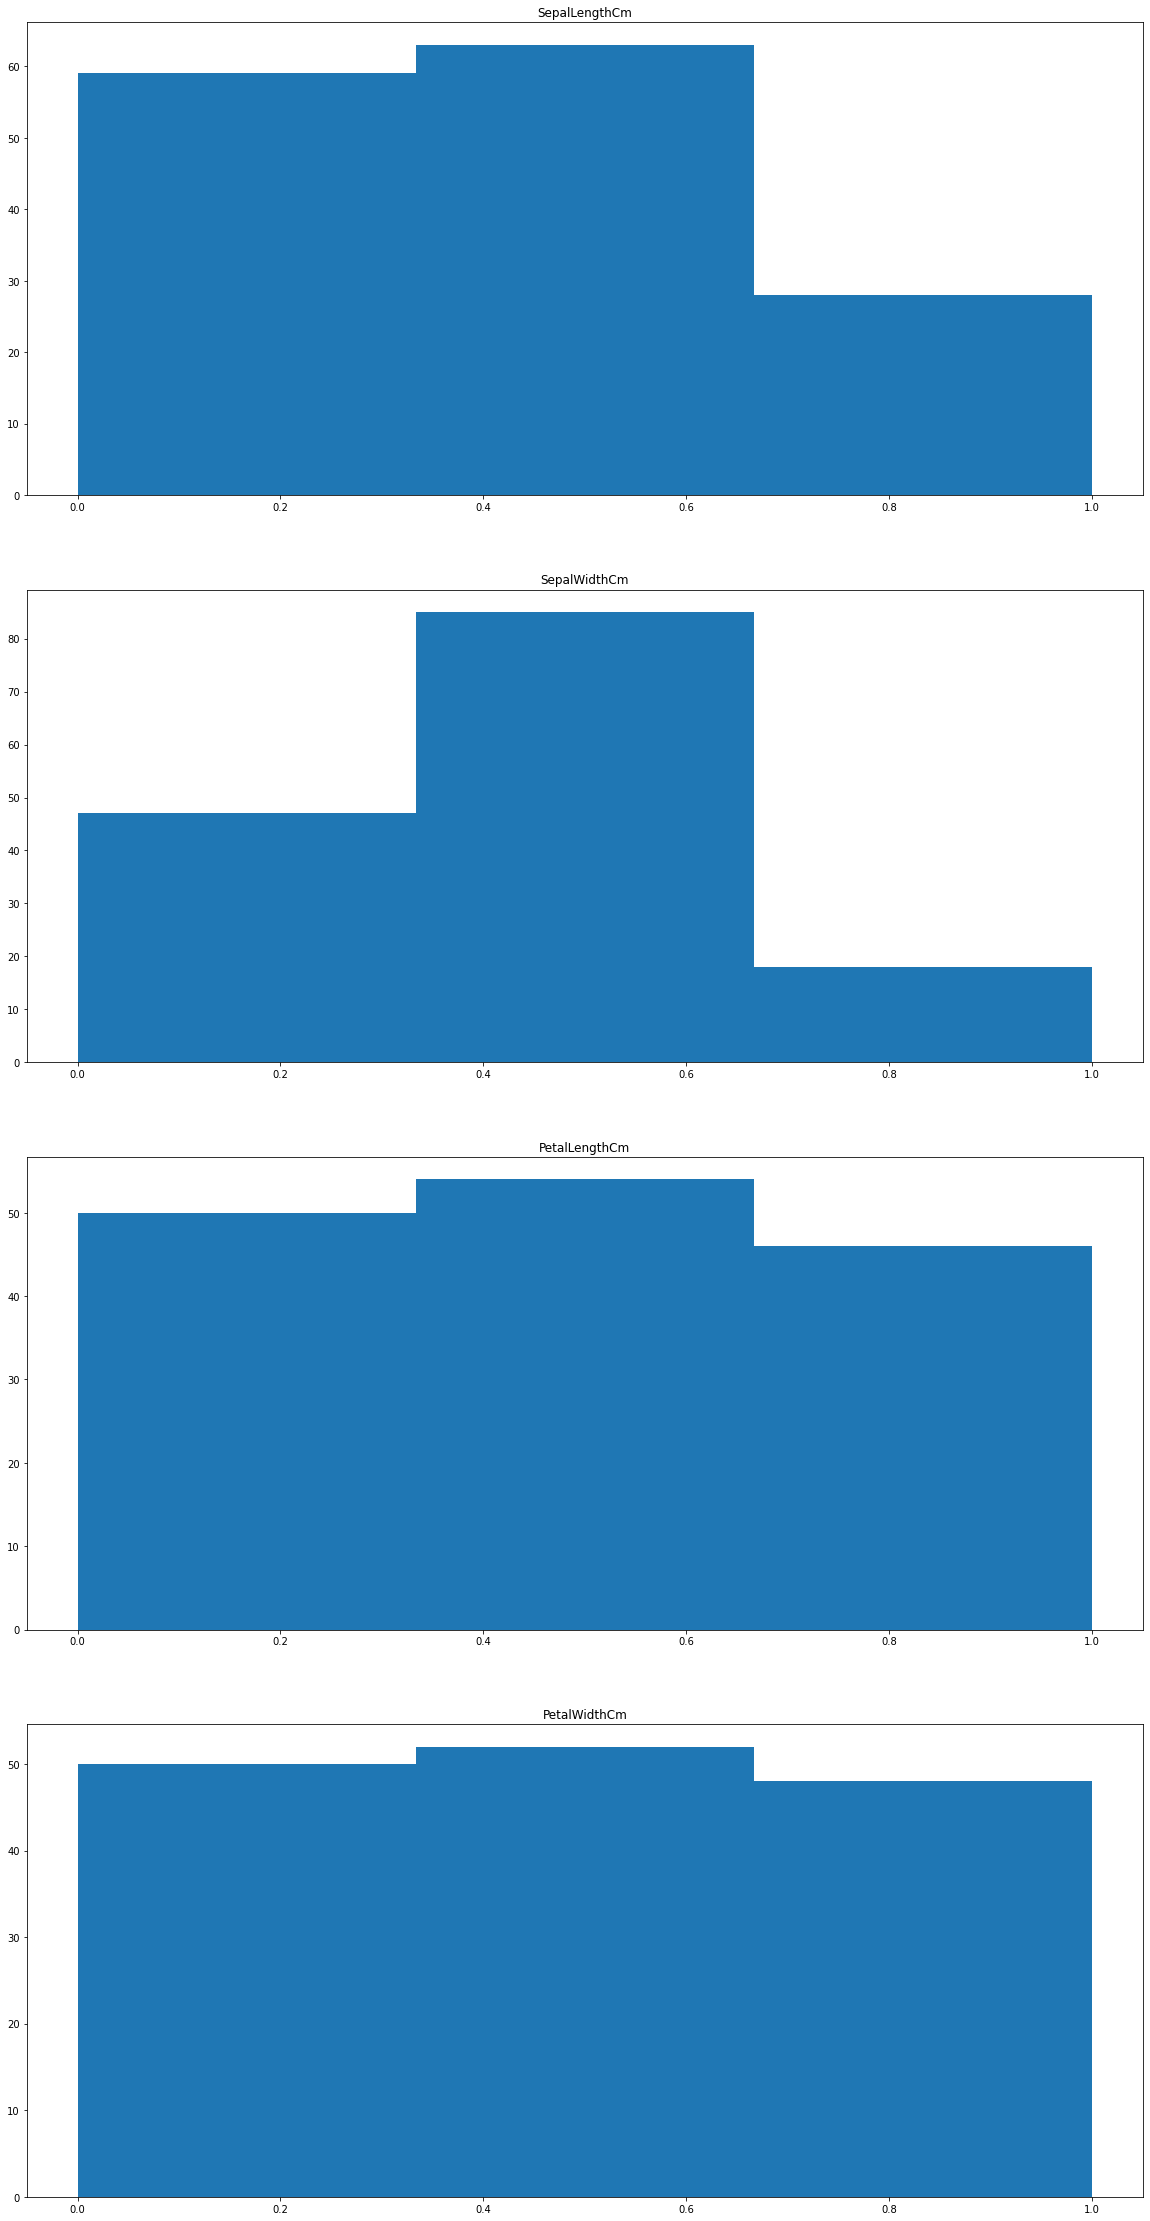

In [7]:
mscaler=MinMaxScaler()
scaledx=mscaler.fit_transform(data)
#scaledx[:,0]

fig2,axes2=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes2):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

In [8]:
#modeling
from sklearn.cluster import KMeans

model=KMeans()

model.fit(scaledx[:,2:4])
model.labels_,model.inertia_

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 3, 0, 4, 4, 0, 4, 0, 3, 4, 4,
        3, 0, 3, 0, 1, 4, 3, 4, 4, 4, 3, 1, 3, 0, 0, 0, 4, 3, 3, 3, 3, 4,
        4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 0, 4, 7, 1, 7, 6, 7, 5, 3, 6, 6, 7,
        1, 1, 7, 1, 7, 7, 6, 5, 5, 3, 7, 1, 5, 1, 7, 6, 1, 1, 7, 6, 6, 5,
        7, 3, 3, 7, 7, 6, 1, 7, 7, 7, 1, 7, 7, 7, 1, 1, 7, 1]),
 0.4890323753218529)

Text(0, 0.5, 'PetalWidth')

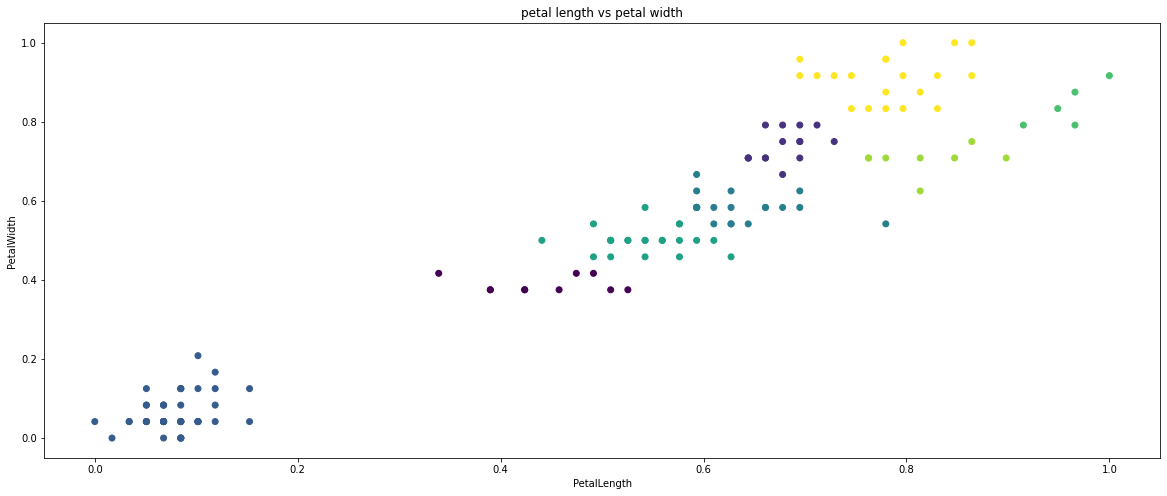

In [9]:
fig3,axes3=plt.subplots(1,1,figsize=(20,8))
axes3.scatter(scaledx[:,2],scaledx[:,3],c=model.labels_)
axes3.set_title('petal length vs petal width')
axes3.set_xlabel('PetalLength')
axes3.set_ylabel('PetalWidth')

Inertia For 2=> 5.179687509974783
Inertia For 3=> 1.7050986081225123
Inertia For 4=> 1.1621031930971286
Inertia For 5=> 0.8570856553216398
Inertia For 6=> 0.6833274904190353
Inertia For 7=> 0.570091750569181
Inertia For 8=> 0.49022252495690866
Inertia For 9=> 0.4398269660449366
Inertia For 10=> 0.3698519295776057
Inertia For 11=> 0.33733586946328886
Inertia For 12=> 0.29876703112139025
Inertia For 13=> 0.268960130382966
Inertia For 14=> 0.2596818578796639


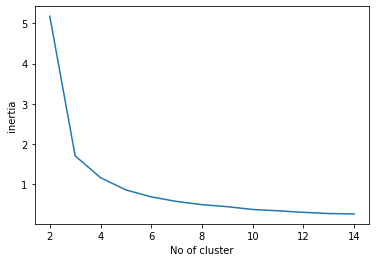

In [10]:
#choosing k value
inertia=[]
for k in range(2,15):
    Model=KMeans(n_clusters=k)

    Model.fit(scaledx[:,2:4])
    print(f'Inertia For {k}=> {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)),inertia)
plt.xlabel('No of cluster')
plt.ylabel('inertia')
plt.show()    

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'PetalWidth')

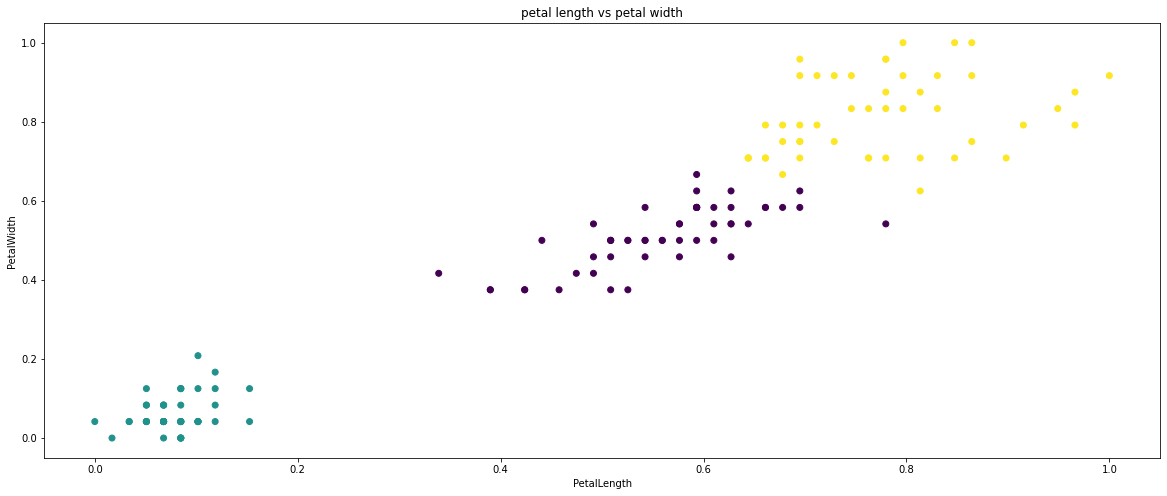

In [14]:
#final model

fmodel=KMeans(n_clusters=3)
fmodel.fit(scaledx[:,2:4])
ypred=fmodel.predict(scaledx[:, 2:4])

print(ypred)

fig4,axes4=plt.subplots(1,1,figsize=(20,8))

axes4.scatter(scaledx[:,2],scaledx[:,3],c=fmodel.labels_)
axes4.set_title('petal length vs petal width')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')

In [15]:
set(fmodel.labels_)

{0, 1, 2}

In [17]:
##Validation
from sklearn.metrics import silhouette_score,silhouette_samples

silhouette_score(scaledx,ypred),silhouette_samples(scaledx,ypred)

(0.48167082884024637,
 array([ 0.78324979,  0.70271943,  0.75593664,  0.71893392,  0.77546204,
         0.64694332,  0.74993829,  0.78590681,  0.63181484,  0.7355852 ,
         0.72233669,  0.77470221,  0.7043695 ,  0.6562191 ,  0.60101438,
         0.49924079,  0.66417302,  0.77585814,  0.62395724,  0.72644536,
         0.71892296,  0.72912864,  0.73873349,  0.68143093,  0.74612198,
         0.68574726,  0.74792817,  0.77154276,  0.77202552,  0.7471226 ,
         0.72909965,  0.69941474,  0.64859147,  0.59869375,  0.7355852 ,
         0.75873646,  0.71890558,  0.7355852 ,  0.66818773,  0.78084803,
         0.77904903,  0.37325111,  0.71244223,  0.67031327,  0.67866813,
         0.68882776,  0.72848195,  0.74412622,  0.73755296,  0.77900847,
         0.01260942,  0.19145171, -0.05910374,  0.52362036,  0.26433087,
         0.5528343 ,  0.04307928,  0.34233108,  0.3301741 ,  0.51255862,
         0.3833533 ,  0.43790301,  0.49517925,  0.42722917,  0.54417374,
         0.21376882,  0.42117

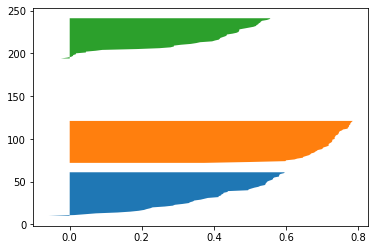

In [28]:
sscore,ssample=silhouette_score(scaledx,ypred),silhouette_samples(scaledx,ypred)
ylow=10
for i in set(fmodel.labels_):
    isample=ssample[ypred==i]
    isample.sort()
    yup=ylow+isample.shape[0]
    plt.fill_betweenx(np.arange(ylow,yup),0,isample)
    ylow=yup+ylow
plt.show()    

In [24]:
ssample[ypred==i]
ssample[ypred==0]

array([ 0.01260942,  0.19145171, -0.05910374,  0.52362036,  0.26433087,
        0.5528343 ,  0.04307928,  0.34233108,  0.3301741 ,  0.51255862,
        0.3833533 ,  0.43790301,  0.49517925,  0.42722917,  0.54417374,
        0.21376882,  0.42117711,  0.58142095,  0.34593476,  0.5851248 ,
        0.5437095 ,  0.29196547,  0.50453798,  0.43928988,  0.28612956,
        0.16836335,  0.4199911 ,  0.54656856,  0.56441546,  0.54823133,
        0.59720431,  0.22389613,  0.41299312,  0.13263807,  0.07284339,
        0.42624336,  0.5290095 ,  0.56461321,  0.56836786,  0.41349994,
        0.59482265,  0.37345942,  0.58089303,  0.54106086,  0.56013257,
        0.49694242,  0.36336084,  0.58187805,  0.3343295 ,  0.3132718 ,
        0.20634681,  0.23012197])